# **Predicting Titanic Survivors: A Machine Learning Approach**


Importing the Packages

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing libraries for model building
from sklearn.model_selection import train_test_split
#importing regression libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc # Import necessary functions
#import metrics to check accuracy
from sklearn.metrics import accuracy_score


Load the dataset and preview

In [79]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Generate summary statistics for the Dataset

In [80]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Find the dimensions of a DataFrame

In [81]:
df.shape

(891, 12)

To get a basic structure of the Dataset

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Find the null values in the Dataset

In [83]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Visualizing the Missing values in the Dataset

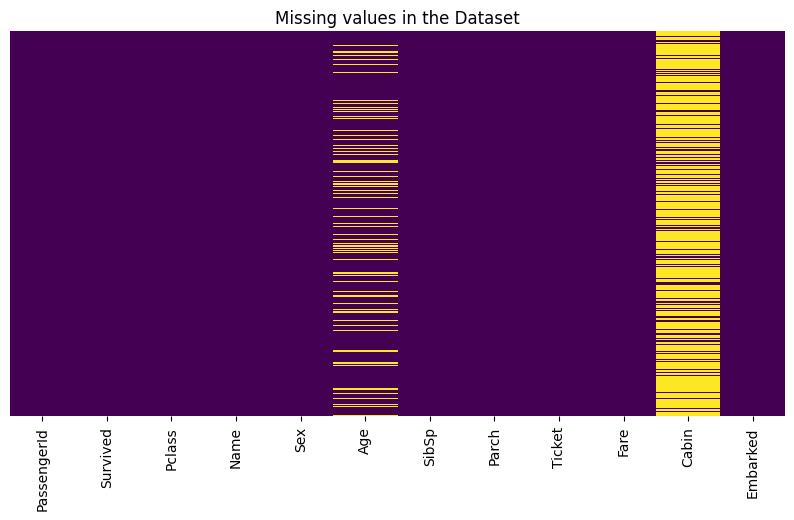

In [84]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values in the Dataset')
plt.show()

# Visualizing Age distribution by Survival

<ipython-input-86-ad434c1a38e0>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Survived"]==1]["Age"],shade=True,color='g',label='Survived=1')
<ipython-input-86-ad434c1a38e0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Survived"]==0]["Age"],shade=True,color='r',label='Survived=0')


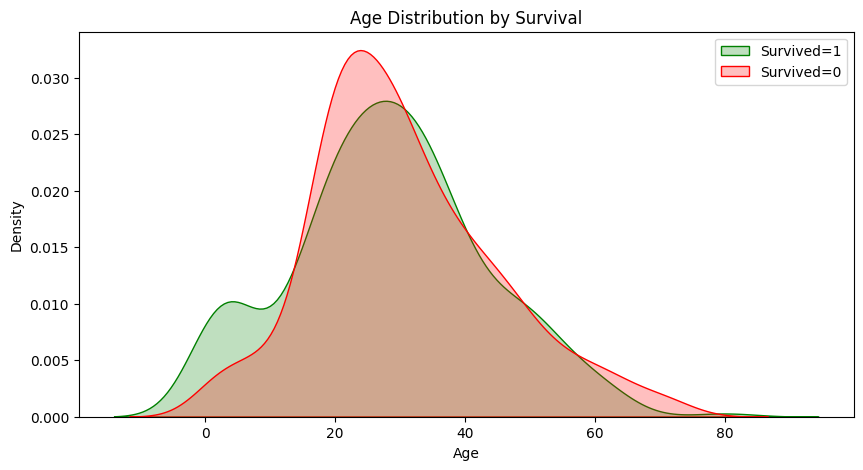

In [86]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df["Survived"]==1]["Age"],shade=True,color='g',label='Survived=1')
sns.kdeplot(df[df["Survived"]==0]["Age"],shade=True,color='r',label='Survived=0')
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()

Find the Unique values in the Column name "Embarked"

In [87]:
emb_unique=df["Embarked"].unique()
print(emb_unique)

['S' 'C' 'Q' nan]


Transforming Embarked column into dummy variables (Categorical Variables into Numerical Variables)

In [88]:
ports=pd.get_dummies(df.Embarked,prefix='Embarked',dtype=int)
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [89]:
#Joining the dummy variables with the dataset
df=df.join(ports)

In [90]:
#Removing the Embarked column
df.drop(['Embarked'],axis=1,inplace=True)

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [92]:
#Transform Categorical Variable "Sex" to numerical variables 1 and 0s
df.Sex=df.Sex.map({'male':0,'female':1})

In [93]:
df['Sex']

,Sex
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [94]:
#splitting the data
Y=df.Survived.copy()
X=df.drop(['Survived'],axis=1)

In [95]:
# Removing Unnecessary attributes
X.drop(['Cabin','Ticket','Name','PassengerId'],axis=1, inplace=True)

In [96]:
#Checking for Null values
X.isnull().sum()

,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


**Imputing Missing values in Column Age with Mean value**

In [97]:
X.Age.fillna(X.Age.mean(),inplace=True)

<ipython-input-97-d9dd57ff4da2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.Age.fillna(X.Age.mean(),inplace=True)


In [98]:
#Checking for null values
X.isnull().values.any()

False

In [99]:
#slpitting the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

In [100]:
#initializing a name
model = LogisticRegression()

In [101]:
#Fitting data to the mode
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
#performance evaluation using R-squared score
model.score(X_train,Y_train)

0.8089887640449438

# **Visualizing the Correlation between different attributes**

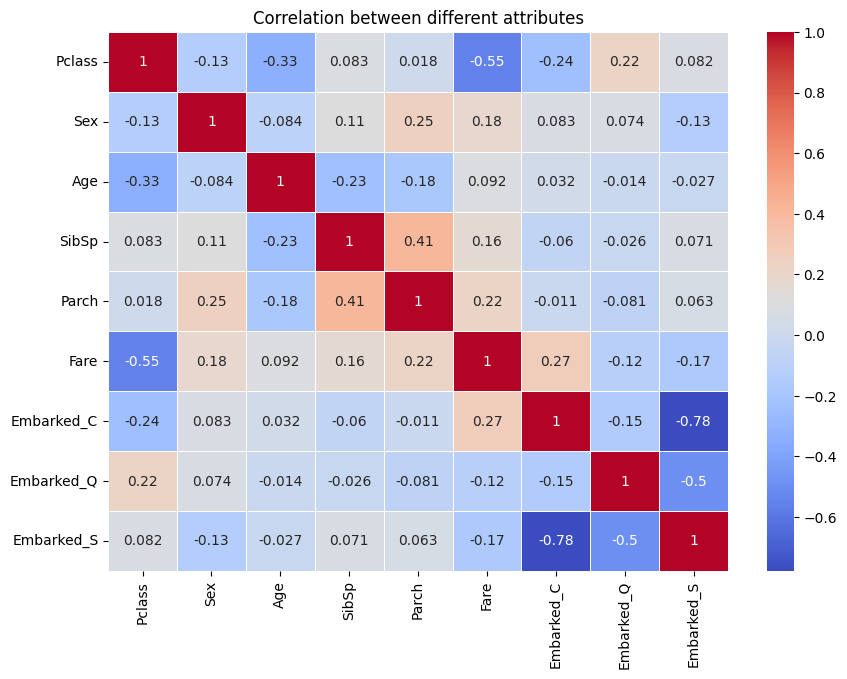

In [103]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation between different attributes')
plt.show()

In [104]:
#predict on the model
Y_pred=model.predict(X_test)
print(Y_pred_test)

[0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1]


In [105]:
Y_test

,Survived
725,0
861,0
528,0
46,0
627,1
...,...
809,1
305,1
538,0
825,0


**Accuracy score of the Model**

In [106]:
print('Model accuracy score:{0:0.4f}'.format(accuracy_score(Y_test,Y_pred_test)))

Model accuracy score:0.7542


# **Visualizing the predictive model's performance across TPR and FPR**

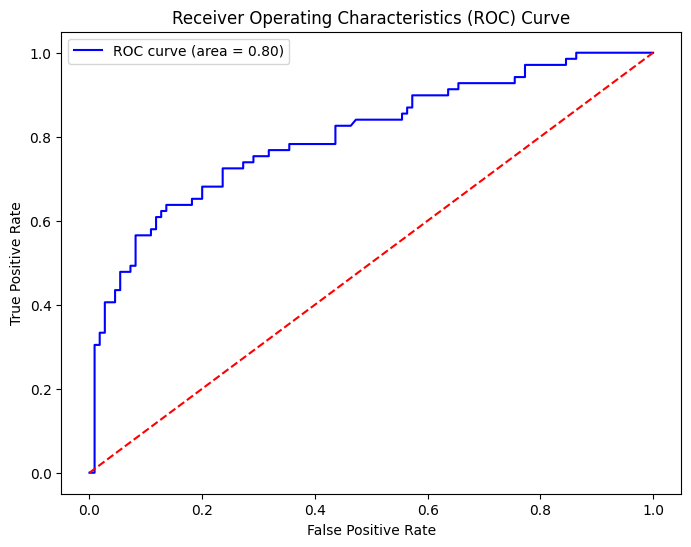

In [107]:
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_prob) # Calculate fpr and tpr using roc_curve
roc_auc = auc(fpr, tpr) # Calculate AUC

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)'%roc_auc,color='blue')
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()

# **Conclusion**
This model performs well, with a solid 75.42% accuracy and a strong R² of 0.8089, showing that it explains most of the variation in survival. The ROC curve (AUC = 0.80) suggests it does a good job distinguishing between survivors and non-survivors. While these results are promising, there’s still room for improvement. Can make it a better performance by refining the features, tweaking hyperparameters, or trying different models like ensemble methods.
